# Load the data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
dirpath = 'HousePredictionKaggle/'
import os
for dirname, _, filenames in os.walk(dirpath):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

HousePredictionKaggle/output.csv
HousePredictionKaggle/data.csv
HousePredictionKaggle/data.dat


In [5]:
## import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pylab import rcParams
from warnings import filterwarnings
filterwarnings('ignore')
rcParams['figure.figsize'] = 12,7
sns.color_palette("hls", 8)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996)]

In [6]:
df = pd.read_csv(dirpath+"/data.csv")  # Reading dataset

# Exploratory Data Analysis

In [7]:
df.head() # looking at the first 5 rows 

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [8]:
df.shape # looking at the shape. we have 4600 rows and 18 columns.

(4600, 18)

In [9]:
df.info() # looking at information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [10]:
df.describe()  # looking at statistical info

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [11]:
import datetime as dt

df["date"]= pd.to_datetime(df["date"])

df["day"] = df["date"].dt.day
df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year

df = df.drop(columns=["date"])

df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,day,month,year
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2,5,2014
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2,5,2014
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2,5,2014
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2,5,2014
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2,5,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA,9,7,2014
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,9,7,2014
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,9,7,2014
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA,10,7,2014


Using datatime, we create new variables for our date variable as day, month and year. Then we can permanently remove our date variable from our dataset.

In [12]:
df["price"]= df["price"].astype("int64")
df["bedrooms"]= df["bedrooms"].astype("int64")
df["bathrooms"]= df["bathrooms"].astype("int64")
df["floors"]= df["floors"].astype("int64")

df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,day,month,year
0,313000,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2,5,2014
1,2384000,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2,5,2014
2,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2,5,2014
3,420000,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2,5,2014
4,550000,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2,5,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166,3,1,1510,6360,1,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA,9,7,2014
4596,534333,3,2,1460,7573,2,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,9,7,2014
4597,416904,3,2,3010,7014,2,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,9,7,2014
4598,203400,4,2,2090,6630,1,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA,10,7,2014


Let's convert the variables that are float in our dataset to int.

In [13]:
df.isnull().sum().sort_values(ascending=False) # checking for missing observations

year             0
month            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
day              0
price            0
dtype: int64

There are no missing observations in our data set. 

# Data Visualization

<Figure size 1152x432 with 0 Axes>

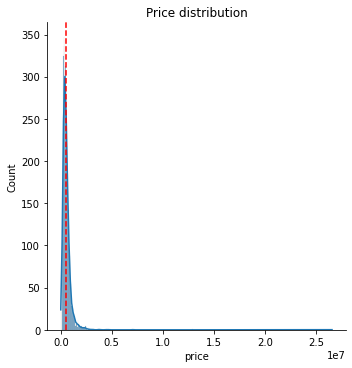

In [14]:
price_des = df['price'].describe()

plt.figure(figsize=(16,6))
sns.displot(df['price'], kde = True)
plt.axvline(price_des['mean'], linestyle = "--", color = "red")
plt.title('Price distribution')
rcParams['figure.figsize'] = 20,10

The price has a right-skewed distribution. To bring this closer to normal, we can subtract the data above 1000000 from our dataset.

In [15]:
a = df[["price"]].mean()

a

price    551962.975435
dtype: float64

In [16]:
len(df)

4600

In [17]:
df["price"].max()

26590000

In [18]:
df["price"].min()

0

In [19]:
len(df[df["price"]<20000])

50

In [20]:
len(df[df["price"]>1500000])

116

In [21]:
df = df[df["price"]>=20000]
df.reset_index(inplace=True)

df = df[df["price"]<=1500000]
df.reset_index(inplace=True)

In [22]:
len(df)

4434

<Figure size 1152x432 with 0 Axes>

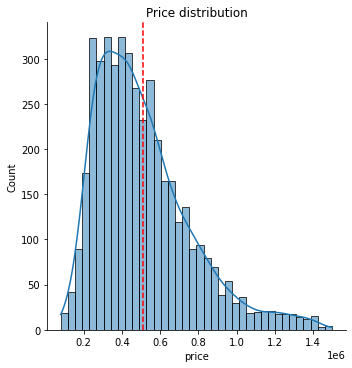

In [23]:
price_des = df['price'].describe()

plt.figure(figsize=(16,6))
sns.displot(df['price'], kde = True)
plt.axvline(price_des['mean'], linestyle = "--", color = "red")
plt.title('Price distribution')
rcParams['figure.figsize'] = 20,10

 In our dataset, we see that the lowest value of the price is "0" and the highest value is "26590000". I think $0 will not be a house and a value like 26590000 will not appeal to the potential buyer. So I decided to set a range to be greater than 20000 and less than 1500000.

(array([2.87e+03, 4.22e+02, 5.03e+02, 4.00e+02, 1.58e+02, 5.30e+01,
        1.40e+01, 1.10e+01, 2.00e+00, 1.00e+00]),
 array([   0.,  285.,  570.,  855., 1140., 1425., 1710., 1995., 2280.,
        2565., 2850.]),
 <BarContainer object of 10 artists>)

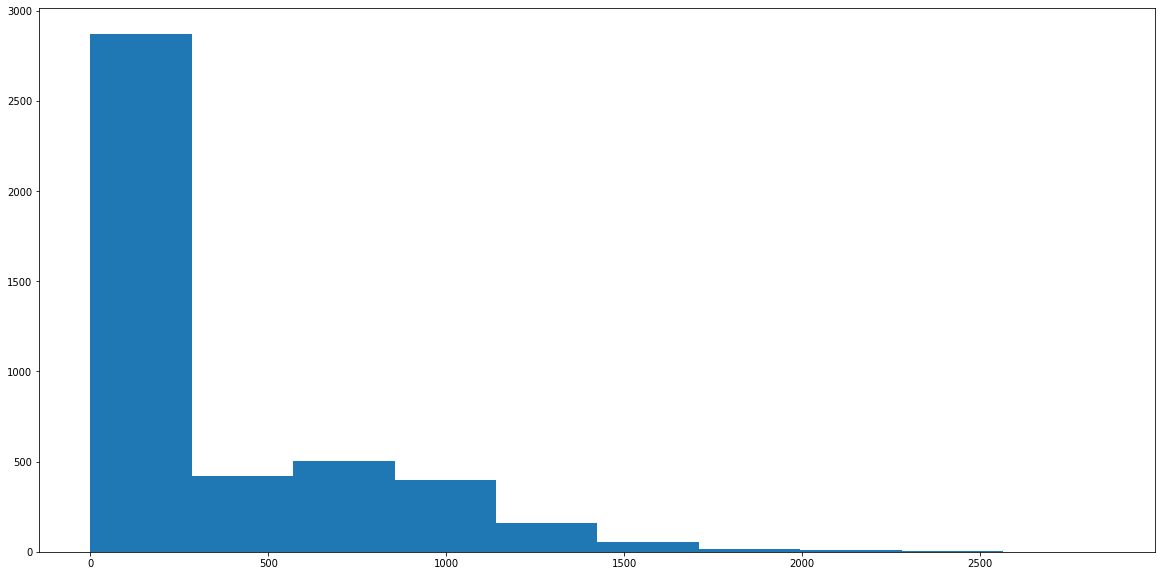

In [24]:
plt.hist(df["sqft_basement"])

(array([199., 171., 243., 263., 491., 628., 493., 617., 508., 821.]),
 array([1900. , 1911.4, 1922.8, 1934.2, 1945.6, 1957. , 1968.4, 1979.8,
        1991.2, 2002.6, 2014. ]),
 <BarContainer object of 10 artists>)

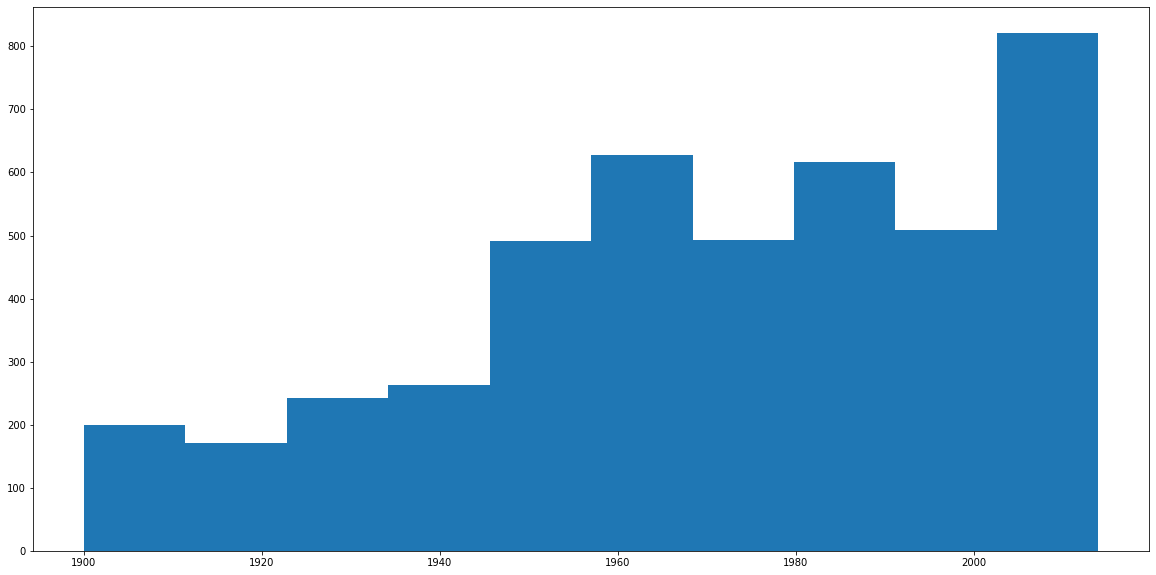

In [25]:
plt.hist(df["yr_built"])

(array([2638.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1796.]),
 array([   0. ,  201.4,  402.8,  604.2,  805.6, 1007. , 1208.4, 1409.8,
        1611.2, 1812.6, 2014. ]),
 <BarContainer object of 10 artists>)

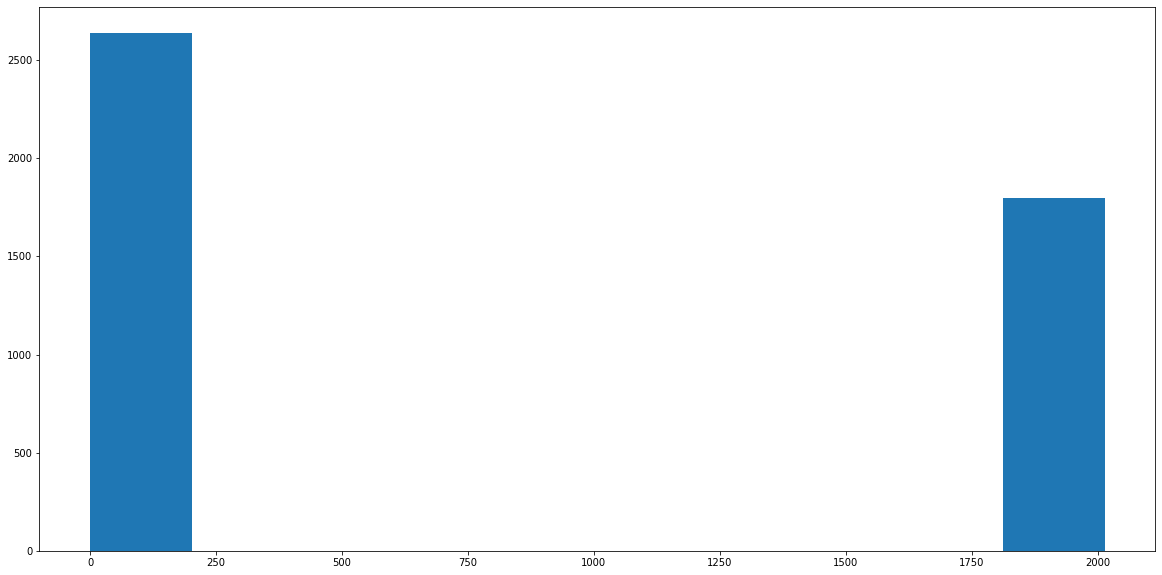

In [26]:
plt.hist(df["yr_renovated"])

In [27]:
df["basement"] = ["No" if i == 0 else "Yes" for i in df["sqft_basement"]]

df["situation"] = ["Former" if i <= 1990 else "New" for i in df["yr_built"]]

df["renewal_status"] = ["Not_renewed" if i == 0 else "Renewed" for i in df["yr_renovated"]]

df

,level_0,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,street,city,statezip,country,day,month,year,basement,situation,renewal_status
0,0,0,313000,3,1,1340,7912,1,0,0,...,18810 Densmore Ave N,Shoreline,WA 98133,USA,2,5,2014,No,Former,Renewed
1,2,2,342000,3,2,1930,11947,1,0,0,...,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2,5,2014,No,Former,Not_renewed
2,3,3,420000,3,2,2000,8030,1,0,0,...,857 170th Pl NE,Bellevue,WA 98008,USA,2,5,2014,Yes,Former,Not_renewed
3,4,4,550000,4,2,1940,10500,1,0,0,...,9105 170th Ave NE,Redmond,WA 98052,USA,2,5,2014,Yes,Former,Renewed
4,5,5,490000,2,1,880,6380,1,0,0,...,522 NE 88th St,Seattle,WA 98115,USA,2,5,2014,No,Former,Renewed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4429,4545,4595,308166,3,1,1510,6360,1,0,0,...,501 N 143rd St,Seattle,WA 98133,USA,9,7,2014,No,Former,Renewed
4430,4546,4596,534333,3,2,1460,7573,2,0,0,...,14855 SE 10th Pl,Bellevue,WA 98007,USA,9,7,2014,No,Former,Renewed
4431,4547,4597,416904,3,2,3010,7014,2,0,0,...,759 Ilwaco Pl NE,Renton,WA 98059,USA,9,7,2014,No,New,Not_renewed
4432,4548,4598,203400,4,2,2090,6630,1,0,0,...,5148 S Creston St,Seattle,WA 98178,USA,10,7,2014,Yes,Former,Not_renewed


When we examine this histosgaram graph, I decide to create new categories. First, the category created as Basement gives information about whether there is a basement area or not. Secondly, the situation gives information about whether the houses are old or new in the range determined according to the year of construction. It was determined as "new" after "old" before 1990. Third, renewal_status informs about the renewal status of the houses as "renewed" or "not renewed".

In [30]:
#!pip install plotly

In [28]:
import plotly.express as px
import plotly.graph_objects as go

In [31]:
keys = df['basement'].value_counts().keys().to_list()
values = df['basement'].value_counts().to_list()
fig = go.Figure(go.Pie(labels=keys,
                      values= values, 
                      hole = 0.5))
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

39.6% of the houses have a basement area, while 60.04% do not.

<Figure size 1152x432 with 0 Axes>

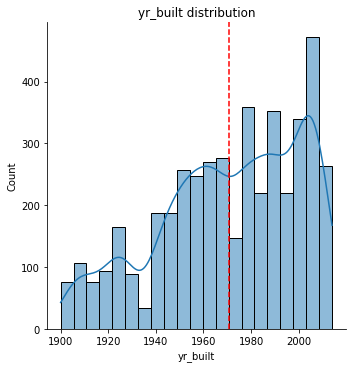

In [32]:
yr_built_des = df['yr_built'].describe()

plt.figure(figsize=(16,6))
sns.displot(df['yr_built'], kde = True)
plt.axvline(yr_built_des['mean'], linestyle = "--", color = "red")
plt.title('yr_built distribution')
rcParams['figure.figsize'] = 20,10

We see that the houses were built in 1970 on average and after 1975 they increased with an interval of 1 year. The year most houses were built was in 2005.

In [33]:
keys = df['situation'].value_counts().keys().to_list()
values = df['situation'].value_counts().to_list()
fig = go.Figure(go.Pie(labels=keys,
                      values= values, 
                      hole = 0.5))
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

As can be seen from the graph, 3053 houses are old and 1381 houses are new. Although the construction of houses has increased in recent years, the old houses are much more.

In [34]:
keys = df['renewal_status'].value_counts().keys().to_list()
values = df['renewal_status'].value_counts().to_list()
fig = go.Figure(go.Pie(labels=keys,
                      values= values, 
                      hole = 0.5))
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

40.5% of the houses in our dataset are renovated, 59.5% are not. We understand that a high percentage of the houses are both old and not renovated.

Now let's visualize our numeric and categorical variables collectively.

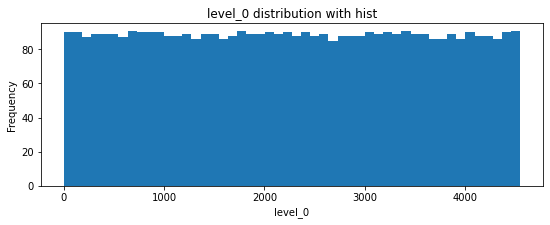

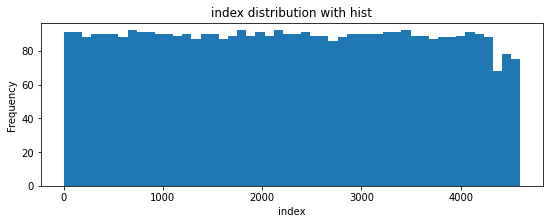

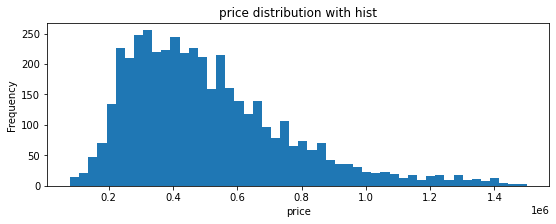

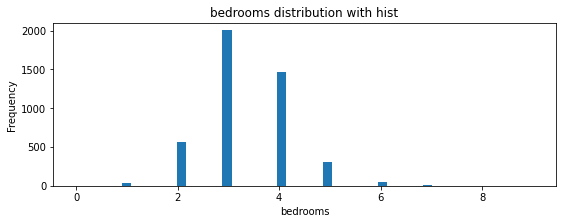

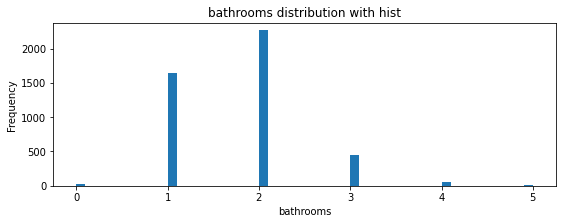

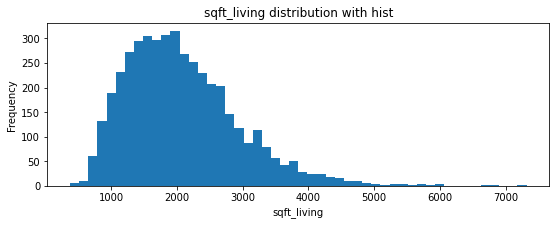

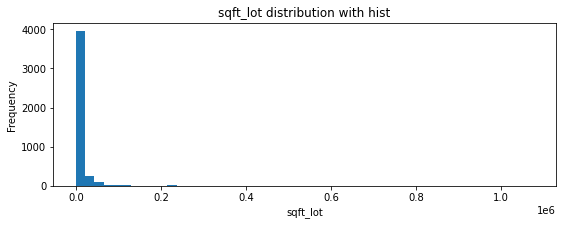

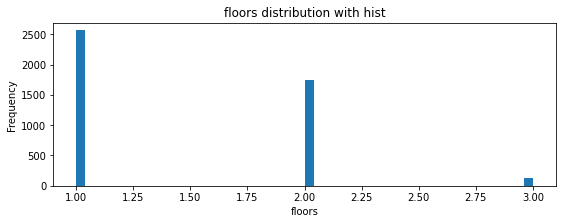

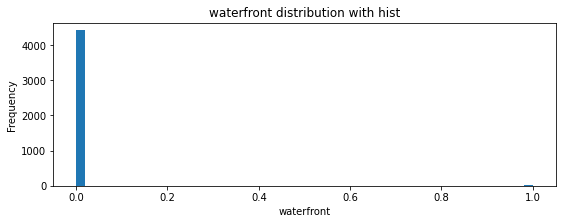

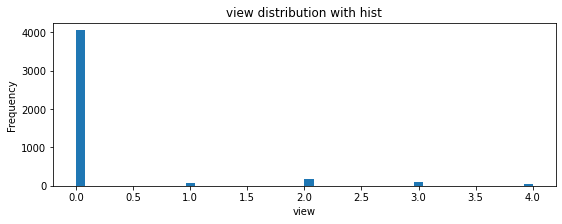

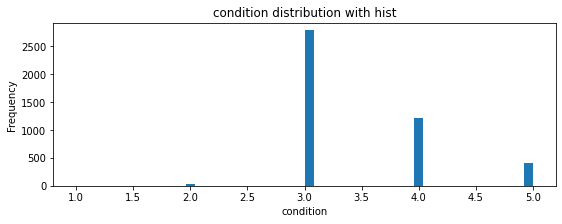

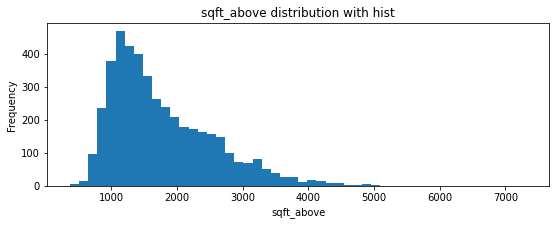

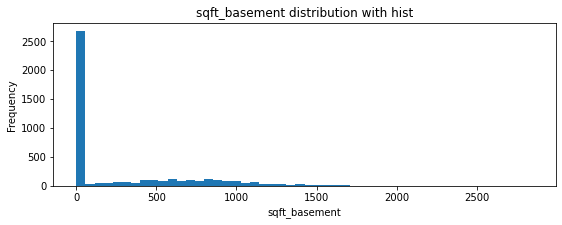

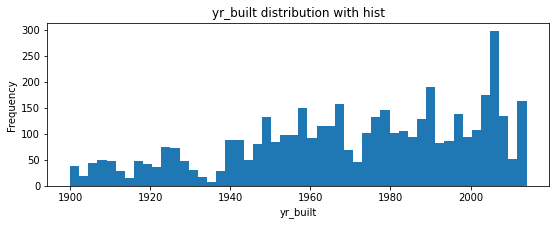

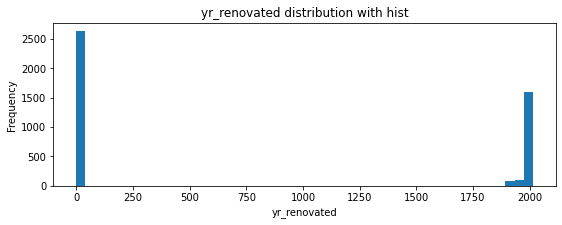

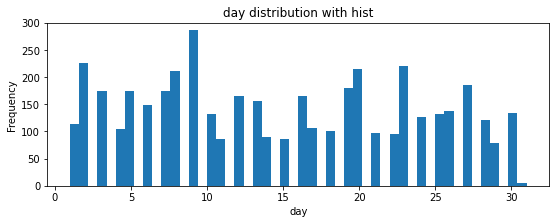

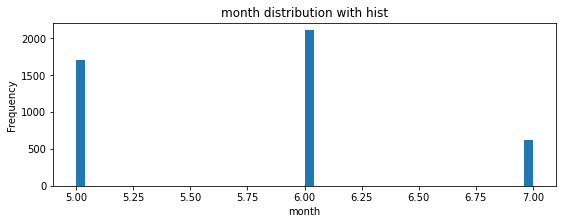

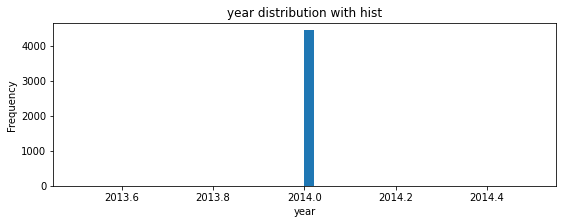

In [35]:
# plotting numerical features 
num_variable = (df.dtypes==float) | (df.dtypes=="int64")
num_variable = df.columns[num_variable].tolist()

def plot_hist(train_df, variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()
    
for i in num_variable:
    plot_hist(df,i)

There are 4361 unique street


Count of street


2520 Mulberry Walk NE    4
2500 Mulberry Walk NE    3
6008 8th Ave NE          2
8354 11th Ave NW         2
1018 NE 96th St          2
17510 12th Ave NE        2
12418 NE 100th St        2
2008 Yale Ave E          2
23620 SE 243rd Pl        2
8430 8th Ave SW          2
4924 SE 2nd Pl           2
323 25th Ave S           2
4507 Linden Ave N        2
769 N 74th St            2
21132 NE 42nd St         2
5703 Charlotte Ave SE    2
14634 128th Ave NE       2
7490 85th Ave SE         2
106 24th Ave E           2
13516 164th Ave SE       2
Name: street, dtype: int64


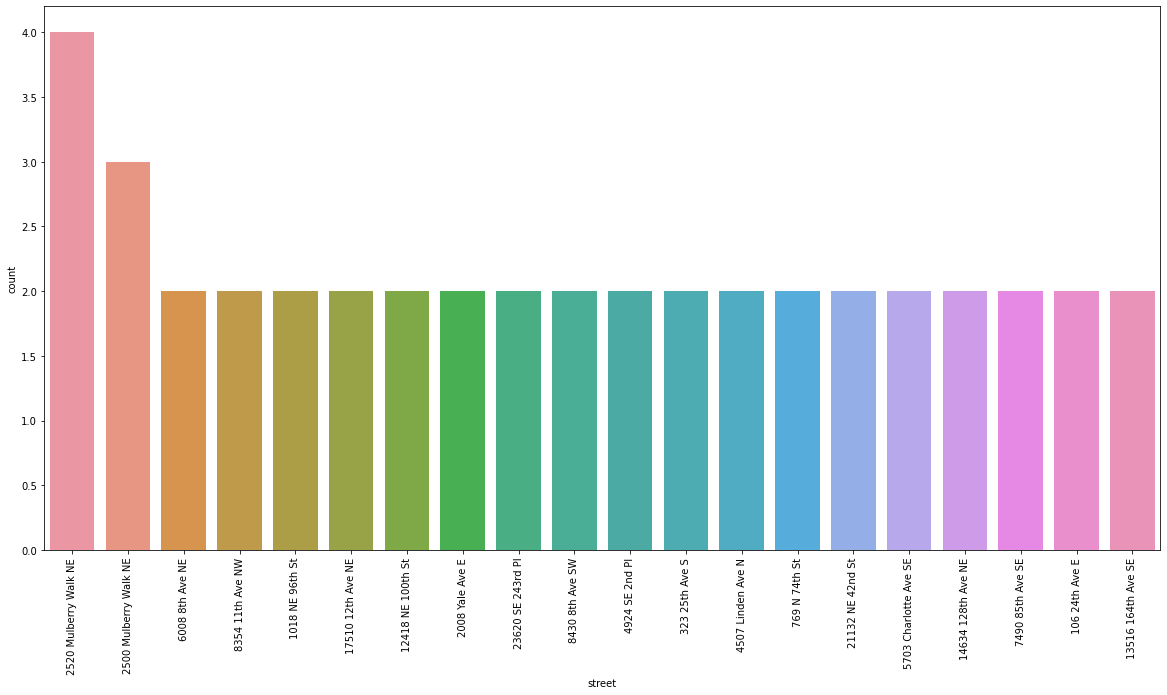



There are 44 unique city


Count of city


Seattle          1520
Renton            291
Bellevue          259
Redmond           233
Issaquah          184
Kent              183
Kirkland          180
Auburn            175
Sammamish         169
Federal Way       145
Shoreline         121
Woodinville       113
Maple Valley       95
Burien             72
Snoqualmie         69
Kenmore            65
Mercer Island      63
Des Moines         58
North Bend         50
Duvall             42
Name: city, dtype: int64


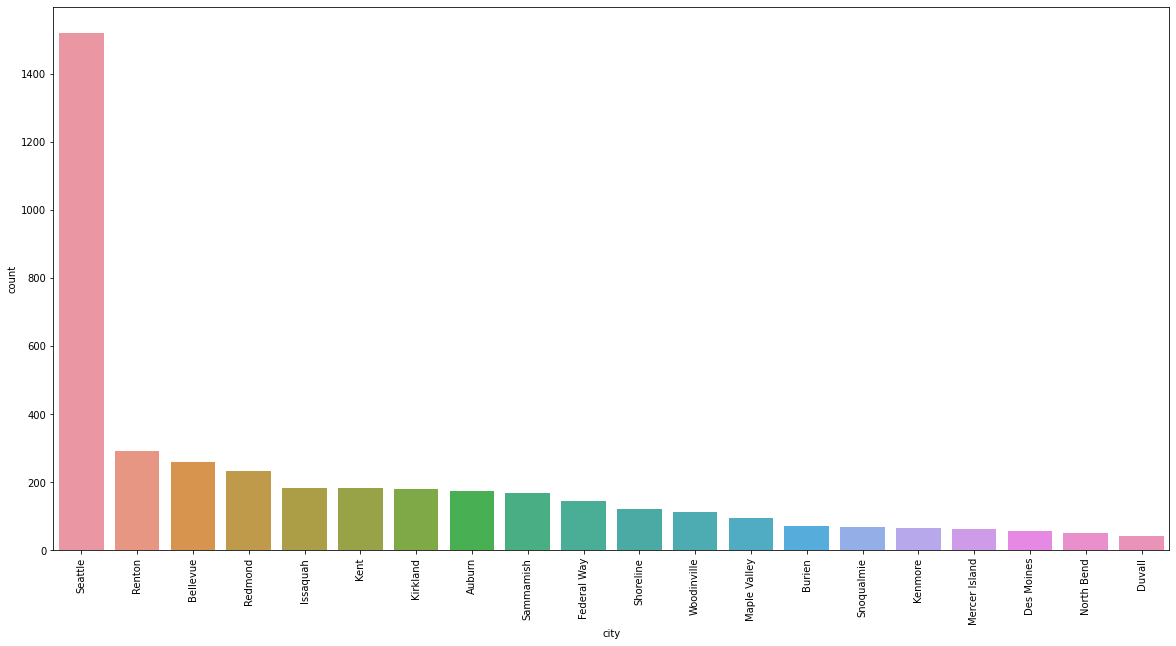



There are 77 unique statezip


Count of statezip


WA 98103    147
WA 98052    134
WA 98117    132
WA 98115    128
WA 98006    107
WA 98059    106
WA 98034     98
WA 98053     97
WA 98042     97
WA 98038     95
WA 98058     95
WA 98027     94
WA 98074     94
WA 98133     93
WA 98023     93
WA 98029     87
WA 98125     87
WA 98155     86
WA 98092     83
WA 98033     83
Name: statezip, dtype: int64


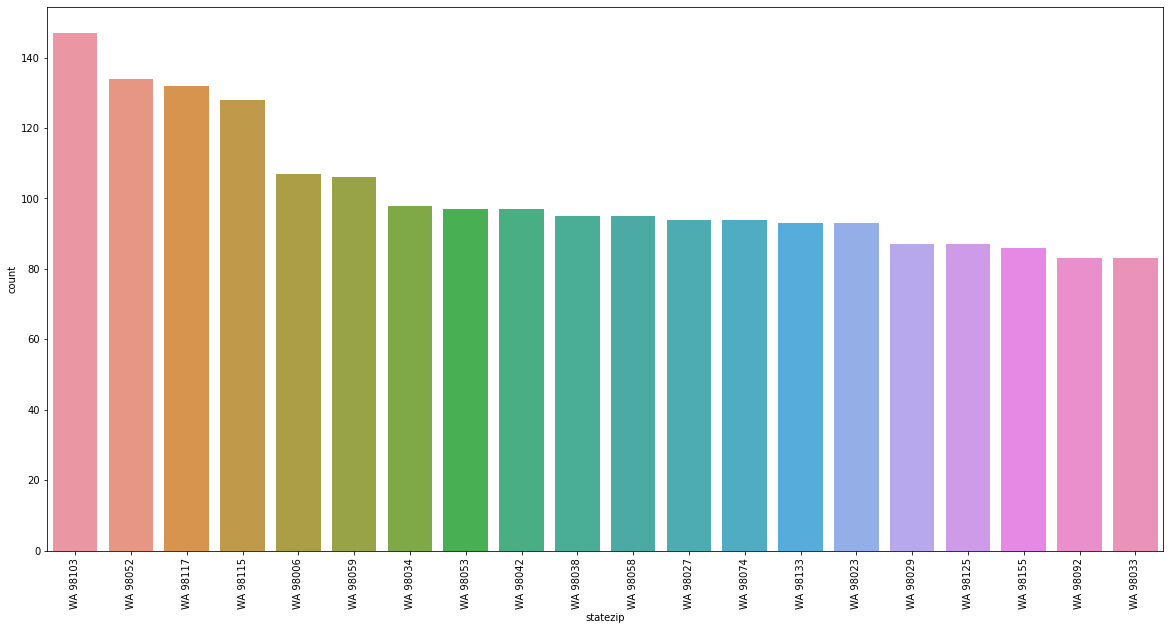



There are 1 unique country


Count of country


USA    4434
Name: country, dtype: int64


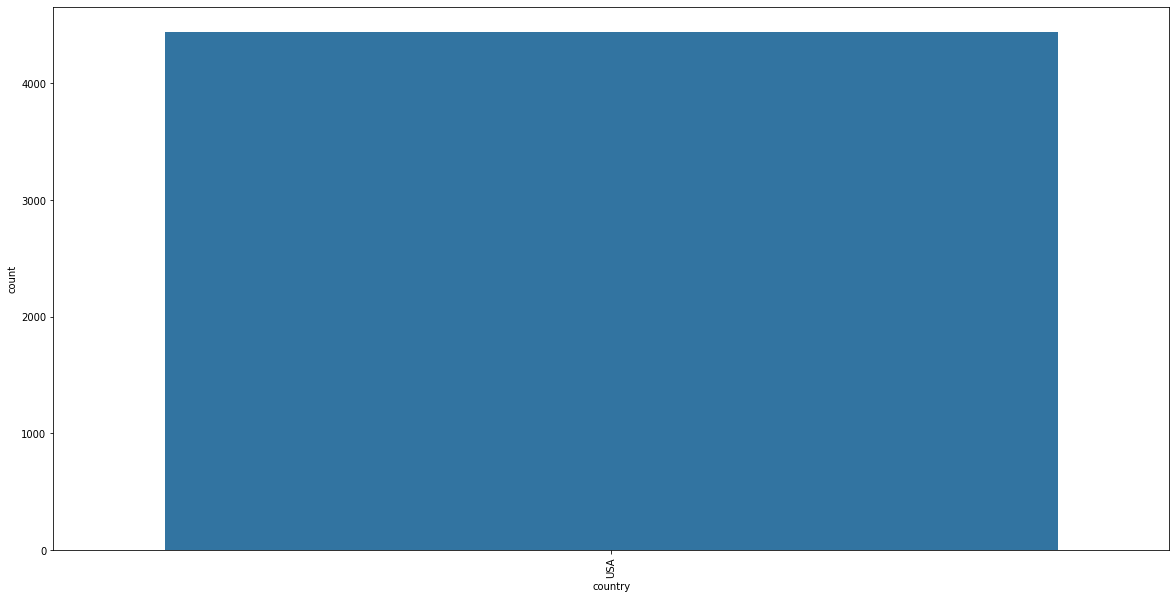



There are 2 unique basement


Count of basement


No     2680
Yes    1754
Name: basement, dtype: int64


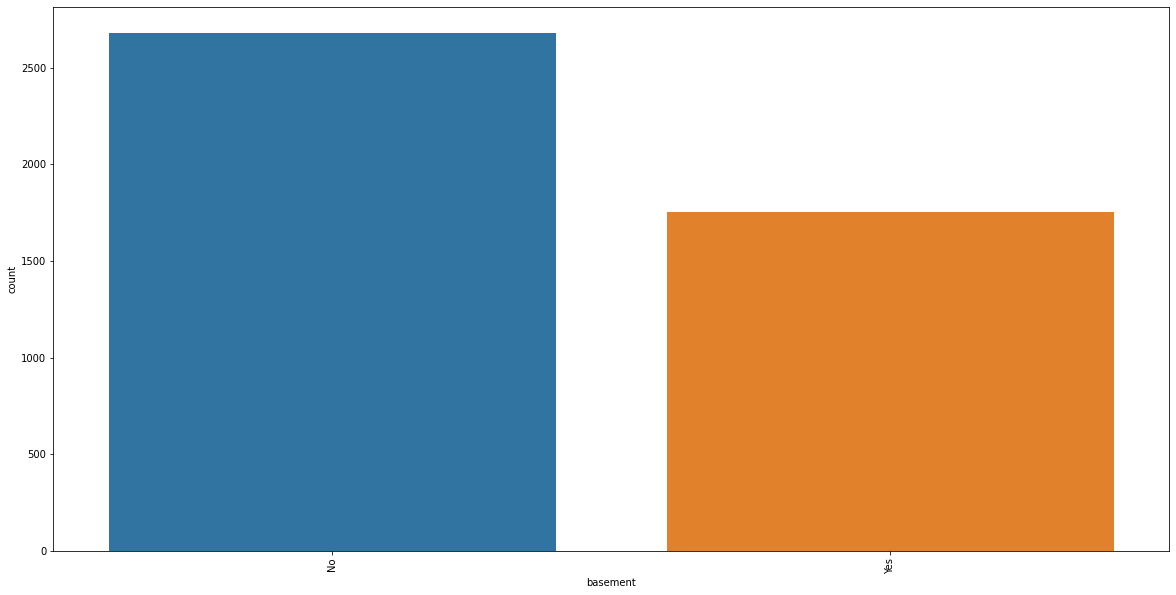



There are 2 unique situation


Count of situation


Former    3053
New       1381
Name: situation, dtype: int64


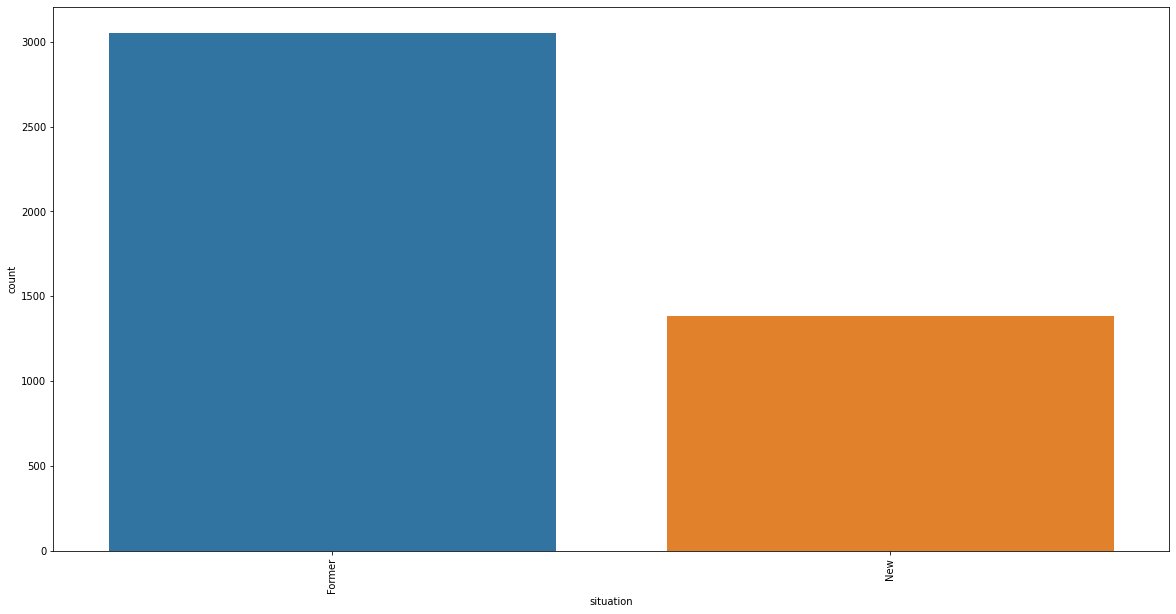



There are 2 unique renewal_status


Count of renewal_status


Not_renewed    2638
Renewed        1796
Name: renewal_status, dtype: int64


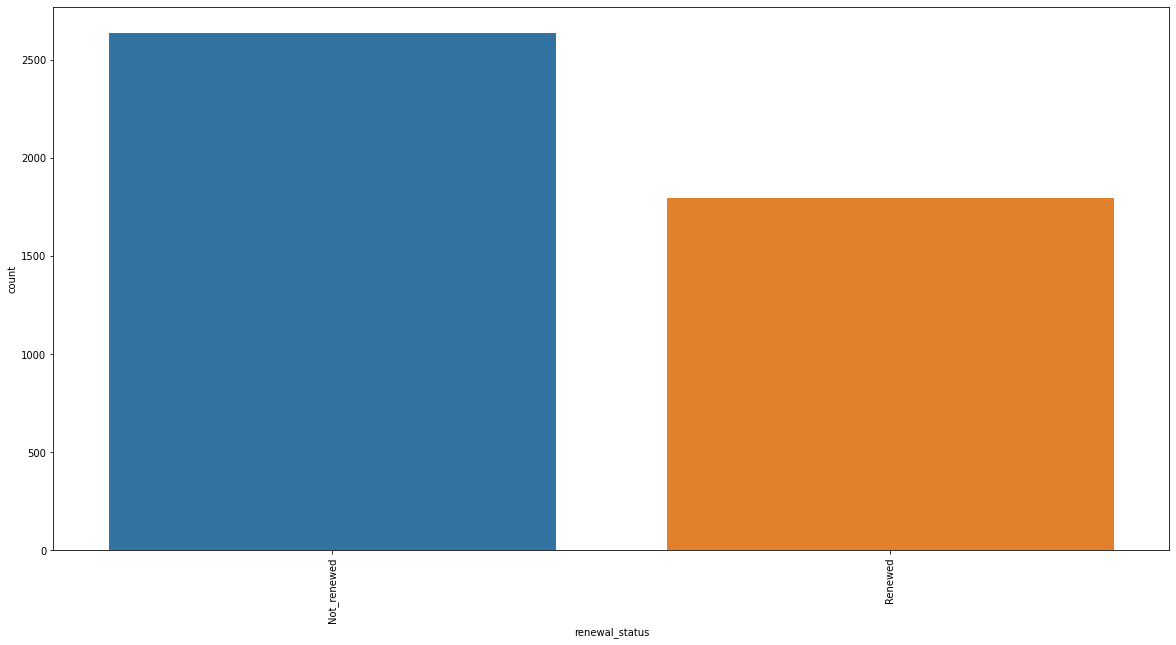

In [36]:
##plotting the categorical features
cat_variable = df.dtypes==object
cat_variable = df.columns[cat_variable].tolist()

# Count of products per keys
def bar_plot(data,feature):
    print(f'There are {len(set(data[feature]))} unique {feature}')
    print('\n')
    sns.countplot(x = feature,
              data = data,
              order = data[feature].value_counts(ascending=False)[0:20].index)
    plt.xticks(rotation=90)
    print(f'Count of {feature}')
    print('\n')
    print(data[feature].value_counts(ascending=False)[0:20])
    plt.show()
    print('\n')
    
for i in cat_variable:
    bar_plot(df,i)

In [37]:
keys = df['bedrooms'].value_counts().keys().to_list()
values = df['bedrooms'].value_counts().to_list()
fig = go.Figure(go.Pie(labels=keys,
                      values= values, 
                      hole = 0.5))
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

45.1% of the homes in our dataset have 3 bedrooms. It is also possible to have 4 bedrooms, but houses with 5, 6, 8 bedrooms are rare.

# Converting Categorical Variables to Numeric Variables

In [38]:
cat_variable = df.dtypes==object
cat_variable = df.columns[cat_variable].tolist()

In [39]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df[cat_variable] = df[cat_variable].apply(lambda col: lb.fit_transform(col.astype(str)))

In [41]:
df.head()

,level_0,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,street,city,statezip,country,day,month,year,basement,situation,renewal_status
0,0,0,313000,3,1,1340,7912,1,0,0,...,18810 Densmore Ave N,Shoreline,WA 98133,USA,2,5,2014,No,Former,Renewed
1,2,2,342000,3,2,1930,11947,1,0,0,...,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2,5,2014,No,Former,Not_renewed
2,3,3,420000,3,2,2000,8030,1,0,0,...,857 170th Pl NE,Bellevue,WA 98008,USA,2,5,2014,Yes,Former,Not_renewed
3,4,4,550000,4,2,1940,10500,1,0,0,...,9105 170th Ave NE,Redmond,WA 98052,USA,2,5,2014,Yes,Former,Renewed
4,5,5,490000,2,1,880,6380,1,0,0,...,522 NE 88th St,Seattle,WA 98115,USA,2,5,2014,No,Former,Renewed


# Getting Rid of Outliers

In [40]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

level_0             2275.25
index               2275.25
price             314412.50
bedrooms               1.00
bathrooms              1.00
sqft_living         1100.00
sqft_lot            5778.25
floors                 1.00
waterfront             0.00
view                   0.00
condition              1.00
sqft_above          1060.00
sqft_basement        590.00
yr_built              46.00
yr_renovated        1999.00
street              2184.50
city                  18.00
statezip              34.00
country                0.00
day                   16.00
month                  1.00
year                   0.00
basement               1.00
situation              1.00
renewal_status         1.00
dtype: float64


In [41]:
df =df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.dropna(inplace=True)

In [42]:
df

,level_0,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,street,city,statezip,country,day,month,year,basement,situation,renewal_status
0,0,0,313000,3,1,1340,7912,1,0,0,...,1470,36,62,0,2,5,2014,0,0,1
1,2,2,342000,3,2,1930,11947,1,0,0,...,2221,18,26,0,2,5,2014,0,0,0
2,3,3,420000,3,2,2000,8030,1,0,0,...,4111,3,7,0,2,5,2014,1,0,0
3,4,4,550000,4,2,1940,10500,1,0,0,...,4198,31,31,0,2,5,2014,1,0,1
4,5,5,490000,2,1,880,6380,1,0,0,...,3394,35,54,0,2,5,2014,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4429,4545,4595,308166,3,1,1510,6360,1,0,0,...,3324,35,62,0,9,7,2014,0,0,1
4430,4546,4596,534333,3,2,1460,7573,2,0,0,...,923,3,6,0,9,7,2014,0,0,1
4431,4547,4597,416904,3,2,3010,7014,2,0,0,...,3890,32,37,0,9,7,2014,0,1,0
4432,4548,4598,203400,4,2,2090,6630,1,0,0,...,3372,35,71,0,10,7,2014,1,0,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3406 entries, 0 to 4433
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   level_0         3406 non-null   int64
 1   index           3406 non-null   int64
 2   price           3406 non-null   int64
 3   bedrooms        3406 non-null   int64
 4   bathrooms       3406 non-null   int64
 5   sqft_living     3406 non-null   int64
 6   sqft_lot        3406 non-null   int64
 7   floors          3406 non-null   int64
 8   waterfront      3406 non-null   int64
 9   view            3406 non-null   int64
 10  condition       3406 non-null   int64
 11  sqft_above      3406 non-null   int64
 12  sqft_basement   3406 non-null   int64
 13  yr_built        3406 non-null   int64
 14  yr_renovated    3406 non-null   int64
 15  street          3406 non-null   int64
 16  city            3406 non-null   int64
 17  statezip        3406 non-null   int64
 18  country         3406 non-nul

<AxesSubplot:>

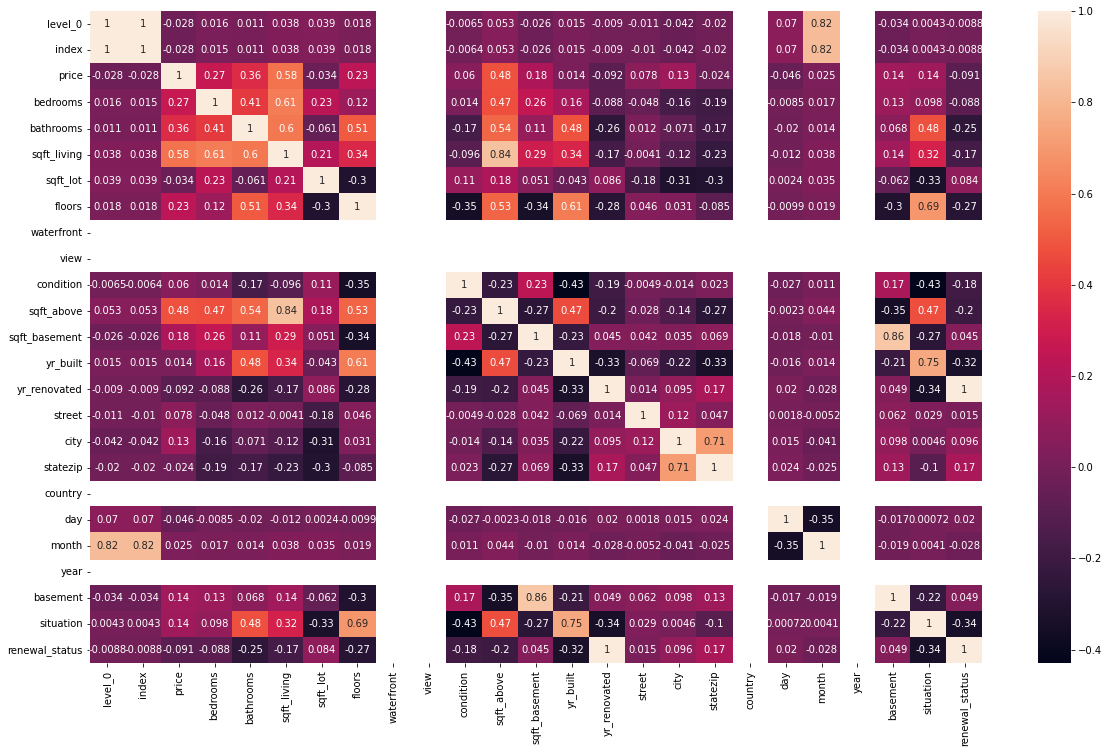

In [44]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True)

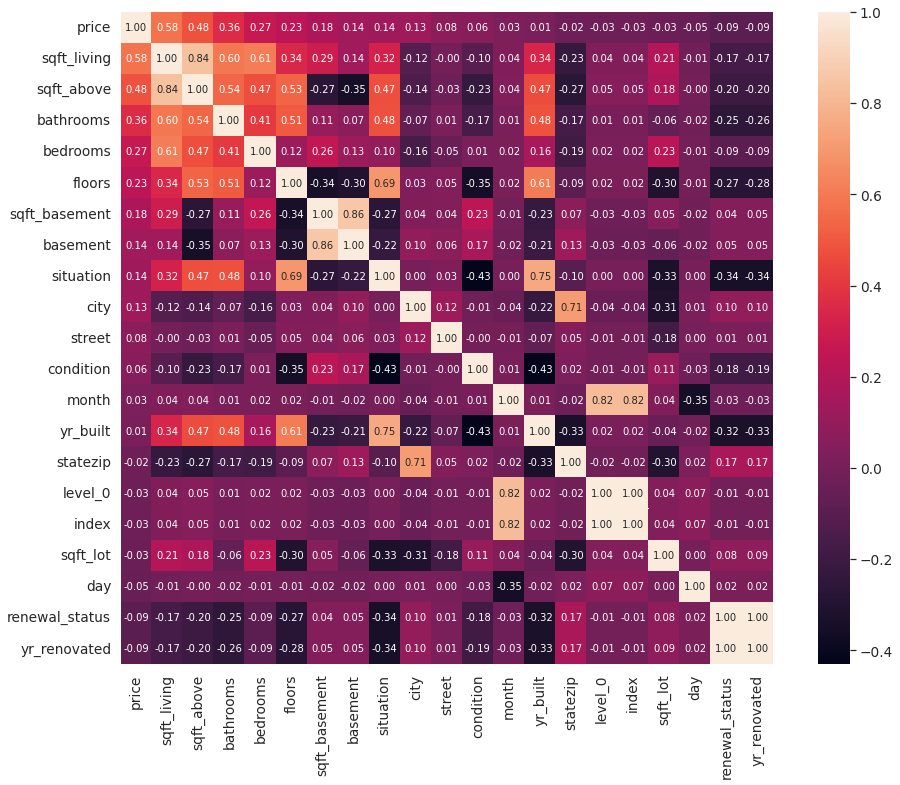

In [45]:
#saleprice correlation matrix
k = 23 #number of variables for heatmap
plt.figure(figsize=(16,12))
corrmat = df.corr()
# picking the top 15 correlated features
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Modelling

Let's start the model!

In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
X = df.drop(columns=["price","view","waterfront","country", "year", "level_0", "index", "situation","basement","renewal_status"])
y = df["price"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [50]:
def models():
    #use logistic regression
    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()
    lr.fit(X_train,y_train)

    #use Kneighbors
    from sklearn.neighbors import KNeighborsRegressor
    knn = KNeighborsRegressor()
    knn.fit(X_train,y_train)

    #use Support vector classifier (linear kernel)
    from sklearn.svm import SVR
    svc = SVR(kernel='linear')
    svc.fit(X_train,y_train)

    #use decision tree
    from sklearn.tree import DecisionTreeRegressor
    tree=DecisionTreeRegressor()
    tree.fit(X_train,y_train)

    #use Random Forest
    from sklearn.ensemble import RandomForestRegressor
    forest = RandomForestRegressor()
    forest.fit(X_train,y_train)

    #use GradientBoosting
    from sklearn.ensemble import GradientBoostingRegressor
    gb = GradientBoostingRegressor()
    gb.fit(X_train,y_train)
    
    
    from xgboost import XGBRegressor
    xgb = XGBRegressor()
    xgb.fit(X_train,y_train)

    from lightgbm import LGBMRegressor
    lgbm = LGBMRegressor()
    lgbm.fit(X_train,y_train)
    #Print the accuracy for ech model
    print("Results")
    print('[0] Logistic Regression Test Error: ',np.sqrt(mean_squared_error(y_test,lr.predict(X_test))))
    print('[1] K neighbors Regression Test Error: ',np.sqrt(mean_squared_error(y_test,knn.predict(X_test))))
    print('[2] SVR linear Regression Test Error: ',np.sqrt(mean_squared_error(y_test,svc.predict(X_test))))
    print('[3] Decision Tree Regression Test Error: ',np.sqrt(mean_squared_error(y_test,tree.predict(X_test))))
    print('[4] Random Forest Regression Test Error: ',np.sqrt(mean_squared_error(y_test,forest.predict(X_test))))
    print('[5] Gradient Boosting Regression Test Error: ',np.sqrt(mean_squared_error(y_test,gb.predict(X_test))))
    print('[6] XGBoost Regression Test Error: ',np.sqrt(mean_squared_error(y_test,xgb.predict(X_test))))
    print('[7] LightGBM Regression Test Error: ',np.sqrt(mean_squared_error(y_test,lgbm.predict(X_test)))) 

    return lr,knn,svc,tree,forest,gb,xgb,lgbm

In [51]:
lr,knn,svc,tree,forest,gb,xgb,lgbm = models()

Results
[0] Logistic Regression Test Error:  137108.5032621895
[1] K neighbors Regression Test Error:  153372.1507337697
[2] SVR linear Regression Test Error:  139614.04901643484
[3] Decision Tree Regression Test Error:  156118.62792258206
[4] Random Forest Regression Test Error:  100682.94438780434
[5] Gradient Boosting Regression Test Error:  97132.75284348978
[6] XGBoost Regression Test Error:  90038.84786722153
[7] LightGBM Regression Test Error:  85438.89440602936


In [57]:
import pickle5 as pickle
# save the model to disk
pickle.dump(lr, open('models/lr.sav', 'wb'))
pickle.dump(knn, open('models/knn.sav', 'wb'))
pickle.dump(svc, open('models/svc.sav', 'wb'))
pickle.dump(tree, open('models/tree.sav', 'wb'))
pickle.dump(forest, open('models/forest.sav', 'wb'))
pickle.dump(gb, open('models/gb.sav', 'wb'))
pickle.dump(xgb, open('models/xgb.sav', 'wb'))
pickle.dump(lgbm, open('models/lgbm.sav', 'wb'))


In [66]:
#load the model from disk
lr = pickle.load(open('models/lr.sav', 'rb'))
result = lr.score(X_test, y_test)
print(result)

knn = pickle.load(open('models/knn.sav', 'rb'))
result = knn.score(X_test, y_test)
print(result)

svc = pickle.load(open('models/svc.sav', 'rb'))
result = svc.score(X_test, y_test)
print(result)

tree = pickle.load(open('models/tree.sav', 'rb'))
result = tree.score(X_test, y_test)
print(result)

forest = pickle.load(open('models/forest.sav', 'rb'))
result = forest.score(X_test, y_test)
print(result)

gb = pickle.load(open('models/gb.sav', 'rb'))
result = gb.score(X_test, y_test)
print(result)

xgb = pickle.load(open('models/xgb.sav', 'rb'))
result = xgb.score(X_test, y_test)
print(result)

lgbm = pickle.load(open('models/lgbm.sav', 'rb'))
result = lgbm.score(X_test, y_test)
print(result)

0.4541733284272176
0.3170026965099426
0.4340419799722399
0.29232243918035294
0.7056677916592324
0.7260587909729614
0.7646111799246456
0.7880481491379396


The model works best with LightGBM.

# Feature Importance

In [52]:
Importance = pd.DataFrame({"Importance": lgbm.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Variable Severity Levels')

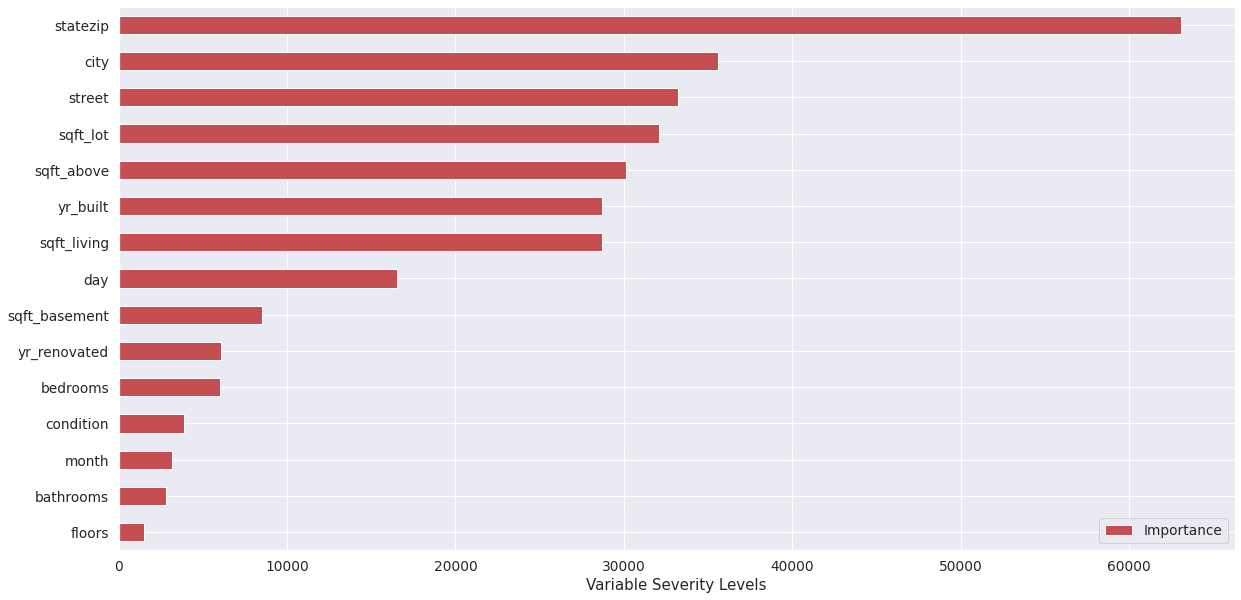

In [53]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Variable Severity Levels")

If you like it plase vote!